### Exploratory Data Analysis for Banking Customer Churn


### Data Collection
- The data consists of 14 column and 10000 rows.

### Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [114]:
#Dataset taken from: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling
df = pd.read_csv('Churn_Modelling.csv')

#### Show Top 5 Records

In [115]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Drop rownumber columns

In [116]:
df = df.drop(columns=['RowNumber','Surname','CustomerId'])

In [117]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Shape of the dataset

In [118]:
df.shape

(10000, 11)

In [119]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Dataset information

- CreditScore : Credit Score
- Geography : Country of Account Holder
- Gender : Gender of Account Holder
- Age : Age of Account Holder
- Tenure: Tenure of Account Holder
- Balance : Balance of Account Holder
- NumOfProducts : Num of products of Account Holder
- HasCrCard : Is Account Holder a credit card holder
- IsActiveMember : Is Account Holder active
- EstimatedSalary : Estimated Salary of Account Holder
- Exited : Churn status of Account Holder


### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### Check Missing values

In [120]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Check Duplicates

In [121]:
df.duplicated().sum()

0

### Check data types

In [122]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Checking the number of unique values of each column

In [123]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

### Check statistics of data set

In [124]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### View Categorical Variables

In [125]:
print("Categories in 'Geography variable:     ",end=" " )
print(df['Geography'].unique().tolist())

print("Categories in 'Gender' variable:  ",end=" ")
print(df['Gender'].unique().tolist())


Categories in 'Geography variable:      ['France', 'Spain', 'Germany']
Categories in 'Gender' variable:   ['Female', 'Male']


In [126]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features = list(df.select_dtypes(include=numeric_lst).columns)
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [127]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

We have 2 categorical features : ['Geography', 'Gender']


### MultiCollinearity testing

In [128]:
data = df[numeric_features + categorical_features]

# creating dummies for categorical variables
keys = ['France', 'Spain', 'Germany']
values = [x for x in range(len(keys))]
data['Geography'] = data['Geography'].map(dict(zip(keys, values)))

keys = ['Female', 'Male']
values = [x for x in range(len(keys))]
data['Gender'] = data['Gender'].map(dict(zip(keys, values)))

In [129]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = data.drop(columns=['Exited'])
Y = data['Exited']
data = data.drop(columns=['Exited'])
data_fs = data
calc_vif(data)

,variables,VIF
0,CreditScore,20.990243
1,Age,12.322347
2,Tenure,3.871267
3,Balance,3.047198
4,NumOfProducts,7.817955
5,HasCrCard,3.289590
6,IsActiveMember,2.074693
7,EstimatedSalary,3.886482
8,Geography,2.097542
9,Gender,2.166197


#### variables to consider removing
- CreditScore
- Age
- NumOfProducts

In [130]:
#drop credit score and test again
data = data.drop(columns=['CreditScore'])
calc_vif(data)

,variables,VIF
0,Age,9.276792
1,Tenure,3.697110
2,Balance,2.866271
3,NumOfProducts,6.423374
4,HasCrCard,3.166658
5,IsActiveMember,2.049847
6,EstimatedSalary,3.713503
7,Geography,2.097519
8,Gender,2.120018


In [131]:
#drop age and test again
data = data.drop(columns=['Age'])
calc_vif(data)

,variables,VIF
0,Tenure,3.518635
1,Balance,2.666791
2,NumOfProducts,5.192412
3,HasCrCard,3.042183
4,IsActiveMember,1.960595
5,EstimatedSalary,3.532542
6,Geography,2.090963
7,Gender,2.089330


### Feature Selection

##### Feature Selection: Variance Threshold
Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the target outputs (y).

In [132]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data_fs)

VarianceThreshold(threshold=0)

In [133]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [134]:
data_fs.columns[var_thres.get_support()]

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender'],
      dtype='object')

In [135]:
constant_columns = [column for column in data.columns
                    if column not in data_fs.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [136]:
for feature in constant_columns:
     print(feature)

#### Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated 

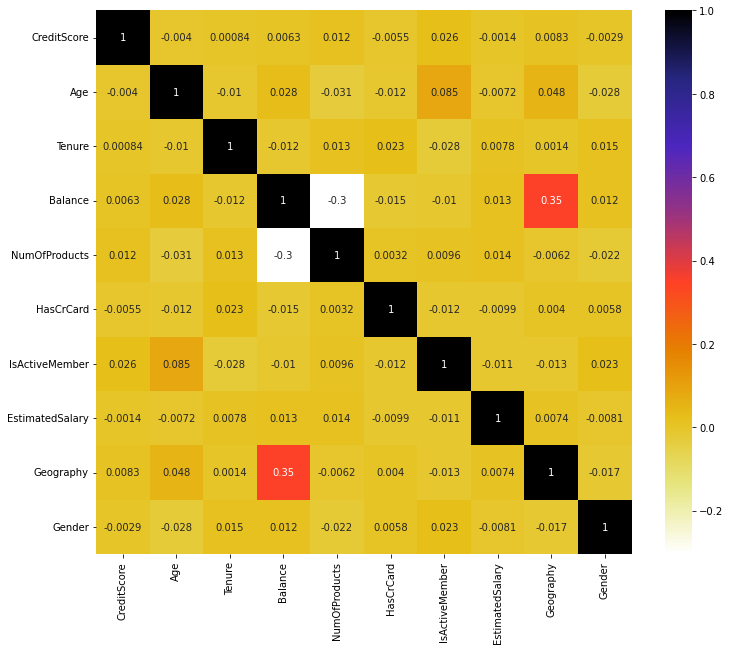

In [137]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data_fs.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [138]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [139]:
corr_features = correlation(data_fs, 0.7)
len(set(corr_features))

0

#### Feature Selection- Information Gain
##### Mutual Information 
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances 

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [140]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X.fillna(0), Y)
mutual_info

array([0.00071629, 0.06773672, 0.00447535, 0.00682267, 0.07233568,
       0.00637543, 0.01033433, 0.00270893, 0.01563219, 0.00205026])

In [141]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

NumOfProducts      0.072336
Age                0.067737
Geography          0.015632
IsActiveMember     0.010334
Balance            0.006823
HasCrCard          0.006375
Tenure             0.004475
EstimatedSalary    0.002709
Gender             0.002050
CreditScore        0.000716
dtype: float64

<AxesSubplot:>

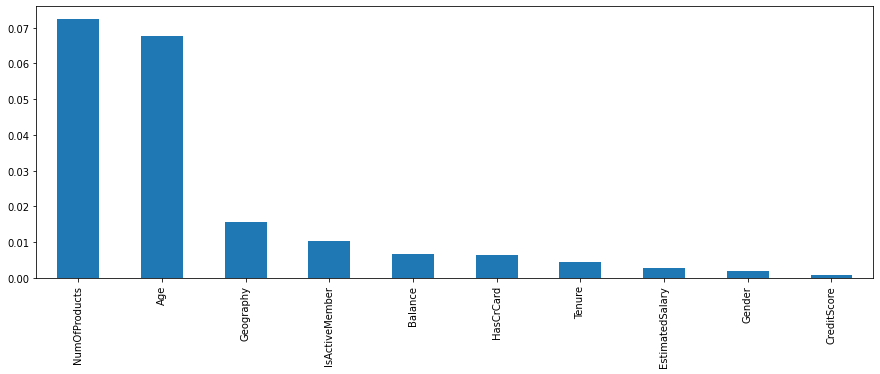

In [142]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [146]:
from sklearn.feature_selection import SelectKBest

#Select the  top 5 important features
sel_cols = SelectKBest(mutual_info_classif, k=10)
sel_cols.fit(X, Y)
X.columns[sel_cols.get_support()]

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender'],
      dtype='object')